In [26]:
import pandas as pd
import ast
import collections
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
import seaborn as sns
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

In [27]:
tweets = pd.read_csv('tweets_csv.csv')
tweets

,Unnamed: 0.1,Unnamed: 0,date,rawContent,user,lang,place,hashtags,likeCount,retweetCount
0,0,0,2018-08-01 07:42:50,Opened the shutters of #Malampuzha dam #Palakk...,"{'username': 'AdvSudhinSuresh', 'id': 77953040...",en,"{'id': '09294260a5199155', 'fullName': 'Ulliye...","['Malampuzha', 'Palakkad', 'KeralaFlood']",0,0
1,1,1,2018-08-09 05:02:39,It's rising. Stay safe. #Keralarains#kalady ht...,"{'username': 'tharunova', 'id': 80231605, 'dis...",en,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN,1,0
2,2,2,2018-08-09 05:42:24,More pics from the scene. #kalady#keralaflood ...,"{'username': 'tharunova', 'id': 80231605, 'dis...",en,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN,0,0
3,3,3,2018-08-09 07:07:00,#idukki dams third shutter opened for first ti...,"{'username': 'shanksnews', 'id': 4656066013, '...",en,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","['idukki', 'Kerala', 'periyar', 'aluva', 'Kera...",0,0
4,4,4,2018-08-09 07:26:31,Idukki dam opened after 26 years!\n#IDUKKI \n#...,"{'username': 'ChandyJongee', 'id': 10159452395...",en,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...","['IDUKKI', 'keralarains']",0,0
...,...,...,...,...,...,...,...,...,...,...
2650,2650,2650,2018-08-30 06:51:13,2 croces from Shriram transport Finance compan...,"{'username': 'KalaiselvanJ', 'id': 357352106, ...",en,"{'id': '5a75c024c6ae075b', 'fullName': 'Uthira...",['KeralaFloods'],1,0
2651,2651,2651,2018-08-30 10:48:18,After a successful show in coimbatore we are p...,"{'username': 'theatrekaran', 'id': 83941462862...",en,"{'id': '4ad0fa6d89777d40', 'fullName': 'Egmore...","['theatrekaran', 'Stories', 'KeralaFloods', 'h...",0,1
2652,2652,2652,2018-08-30 12:03:01,@AAPExpress @ArvindKejriwal @SatyendarJain Tha...,"{'username': 'albypanakalam', 'id': 75216041, ...",en,"{'id': '5f55bb82cf16ac81', 'fullName': 'Bengal...","['StandwithKerala', 'KeralaFloods', 'KeralaFlo...",0,0
2653,2653,2653,2018-08-30 16:08:51,"In Kerala, there’s no reason to damn the dams ...","{'username': 'Tom_Babu', 'id': 635996364, 'dis...",en,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...",['KeralaFloods'],0,1


In [28]:
print(tweets.dtypes)

Unnamed: 0.1     int64
Unnamed: 0       int64
date            object
rawContent      object
user            object
lang            object
place           object
hashtags        object
likeCount        int64
retweetCount     int64
dtype: object


In [29]:
df = tweets.drop(columns=['Unnamed: 0.1','Unnamed: 0','likeCount','retweetCount','user','lang'])
df.head()

,date,rawContent,place,hashtags
0,2018-08-01 07:42:50,Opened the shutters of #Malampuzha dam #Palakk...,"{'id': '09294260a5199155', 'fullName': 'Ulliye...","['Malampuzha', 'Palakkad', 'KeralaFlood']"
1,2018-08-09 05:02:39,It's rising. Stay safe. #Keralarains#kalady ht...,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN
2,2018-08-09 05:42:24,More pics from the scene. #kalady#keralaflood ...,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",NaN
3,2018-08-09 07:07:00,#idukki dams third shutter opened for first ti...,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","['idukki', 'Kerala', 'periyar', 'aluva', 'Kera..."
4,2018-08-09 07:26:31,Idukki dam opened after 26 years!\n#IDUKKI \n#...,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...","['IDUKKI', 'keralarains']"


In [30]:
df.describe()

,date,rawContent,place,hashtags
count,2655,2655,2557,2627
unique,2651,2650,156,1568
top,2018-08-18 06:52:11,@KSAMOFA @KSAmofaEN @KingSalman @KingSalmanEn ...,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...",['KeralaFloods']
freq,2,3,432,470


In [31]:
districts = ['Alappuzha', 'Ernakulam', 'Kozhikode', 'Palakkad', 'Kollam', 'Kannur', 'Kasaragod', 'Idukki', 'Kottayam', 'Thrissur', 'Pathanamthitta', 'Malappuram', 'Wayanad', 'Thiruvananthapuram']

In [32]:
df = df.dropna()
df = df.reset_index()
df = df.drop(columns=['index'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        2530 non-null   object
 1   rawContent  2530 non-null   object
 2   place       2530 non-null   object
 3   hashtags    2530 non-null   object
dtypes: object(4)
memory usage: 79.2+ KB


In [33]:
locations = df['place'].to_list()
print(type(locations[1]))
locations[2]


<class 'str'>


"{'id': '24dab5a953e050c5', 'fullName': 'Trivandrum, India', 'name': 'Trivandrum', 'type': 'city', 'country': 'India', 'countryCode': 'IN'}"

In [34]:
place_list = []
for i in range(2530):
    test_string = locations[i]
    res = ast.literal_eval(test_string)
    place_list.append(res['name'])
place_list
locations[2]

"{'id': '24dab5a953e050c5', 'fullName': 'Trivandrum, India', 'name': 'Trivandrum', 'type': 'city', 'country': 'India', 'countryCode': 'IN'}"

In [35]:
place_df = pd.DataFrame(place_list)
place_df

,0
0,Ulliyeri
1,Kerala
2,Trivandrum
3,Bengaluru South
4,Saidapet
...,...
2525,Uthiramerur
2526,Egmore Nungambakkam
2527,Bengaluru South
2528,Trivandrum


In [36]:
place_df.describe()

,0
count,2530
unique,155
top,Kerala
freq,431


In [37]:
place_df[0].unique()[100:155]

array(['Rameswaram', 'Pallichal', 'Hosakote', 'Udupi', 'Sankarnagar',
       'Alangad', 'Coonoor', 'Cuddapah', 'Tiruvallur', 'Azhikode South',
       'Mangalore', 'Malappuram (Perintalmanna)', 'Kurichikkara',
       'Gokarna', 'Changanacheri', 'Shoranur', 'Nadapuram',
       'Kambainallur', 'Ettumanoor', 'Uthamapalayam', 'Cooke Town',
       'Madayi', 'Kolar', 'Shimoga', 'Kadiri', 'Maniyur', 'Chittoor',
       'Virudhunagar', 'Nazerath', 'Attibele', 'Madanapalle', 'Potture',
       'Kartikapalli', 'Velur', 'Trivandrum City', 'Sulya', 'Hassan',
       'Tindivanam', 'Mookandapalli', 'Haripad', 'Lake Angelus',
       'Bhavani (Tiruchengodu)', 'Tirukalukundram', 'Kasaragod',
       'Valiyakunnu', 'Ramanathapuram', 'Kondotty', 'Cherai', 'Kudremukh',
       'Koramangala', 'Chendamangalam', 'Vilavoorkkal', 'Kanchipuram',
       'Pala', 'Uthiramerur'], dtype=object)

In [38]:
dist_dict = {'Trivandrum City':'Thiruvananthapuram',
             'Haripad':'Alappuzha',
             'Valiyakunnu':'Malappuram',
             'Kondotty':'Malappuram',
             'Cherai':'Ernakulam',
             'Chendamangalam':'Ernakulam',
             'Vilavoorkkal':'Thiruvananthapuram',
             'Pala':'Kottayam',
             'Ulliyeri':'Kozhikode',
             'Trivandrum':'Thiruvananthapuram',
             'Munnar':'Idukki',
             'Kanayannur':'Ernakulam',
             'Trissur':'Thrissur',
             'Ambalappuzha-Alappuzha-Komalapuram-Pathirapally':'Alappuzha',
             'Cherthala':'Alappuzha',
             'Malappuram (Ernad)':'Malappuram',
             'Cochin':'Ernakulam',
             'Kalady':'Ernakulam',
             'Kanhagad-Ajanur-Nileshwar':'Kasaragod',
             'Thanniyam':'Thrissur',
             'Perumbaikad':'Kottayam',
             'Mavelikara':'Alappuzha',
             'Talappalli':'Thrissur',
             'Kotamangalam':'Ernakulam',
             'Kannur-Padanapalam-Talap':'Kannur',
             'Aroor':'Alappuzha',
             'Mukundapuram':'Thrissur',
             'Pattambi':'Palakkad',
             'Parur':'Ernakulam',
             'Perumbavoor':'Ernakulam',
             'Panniyannur':'Kannur',
             'Karunagapalli':'Kollam',
             'Kodungallur':'Thrissur',
             'Pallakad':'Palakkad',
             'Chengannur':'Alappuzha',
             'Alamcode':'Thiruvananthapuram',
             'Pudukad':'Thrissur',
             'Guruvayoor-Manattala-Perakam-Edakkazhiyur':'Thrissur',
             'Peermade':'Idukki',
             'Eloor':'Ernakulam',
             'Paravur':'Kollam',
             'Cheruthazham':'Kannur',
             'Aluva':'Ernakulam',
             'Ambalapulai':'Alappuzha',
             'Ottappalam':'Palakkad',
             'Nedumangad':'Thiruvananthapuram',
             'Payyannur':'Kannur',
             'Chirayinkil':'Thiruvananthapuram',
             'Irinjalakuda':'Thrissur',
             'Vadakra':'Kozhikode',
             'Adat':'Thrissur',
             'Angamaly':'Ernakulam',
             'Attingal':'Thiruvananthapuram',
             'Chalakudy':'Thrissur',
             'Pallichal':'Thiruvananthapuram',
             'Alangad':'Ernakulam',
             'Azhikode':'Kannur',
             'Malappuram (Perintalmanna)':'Malappuram',
             'Kurichikkara':'Thrissur',
             'Changanacheri':'Kottayam',
             'Shoranur':'Palakkad',
             'Nadapuram':'Kozhikode',
             'Ettumanoor':'Kottayam',
             'Kartikapalli':'Alappuzha'
             }

In [39]:
dist_dict.items()

dict_items([('Trivandrum City', 'Thiruvananthapuram'), ('Haripad', 'Alappuzha'), ('Valiyakunnu', 'Malappuram'), ('Kondotty', 'Malappuram'), ('Cherai', 'Ernakulam'), ('Chendamangalam', 'Ernakulam'), ('Vilavoorkkal', 'Thiruvananthapuram'), ('Pala', 'Kottayam'), ('Ulliyeri', 'Kozhikode'), ('Trivandrum', 'Thiruvananthapuram'), ('Munnar', 'Idukki'), ('Kanayannur', 'Ernakulam'), ('Trissur', 'Thrissur'), ('Ambalappuzha-Alappuzha-Komalapuram-Pathirapally', 'Alappuzha'), ('Cherthala', 'Alappuzha'), ('Malappuram (Ernad)', 'Malappuram'), ('Cochin', 'Ernakulam'), ('Kalady', 'Ernakulam'), ('Kanhagad-Ajanur-Nileshwar', 'Kasaragod'), ('Thanniyam', 'Thrissur'), ('Perumbaikad', 'Kottayam'), ('Mavelikara', 'Alappuzha'), ('Talappalli', 'Thrissur'), ('Kotamangalam', 'Ernakulam'), ('Kannur-Padanapalam-Talap', 'Kannur'), ('Aroor', 'Alappuzha'), ('Mukundapuram', 'Thrissur'), ('Pattambi', 'Palakkad'), ('Parur', 'Ernakulam'), ('Perumbavoor', 'Ernakulam'), ('Panniyannur', 'Kannur'), ('Karunagapalli', 'Kollam'),

In [40]:
district_list = []
for place in place_list:
    if place in districts:
        district_list.append(place)
    for key, val in dist_dict.items():
        if(place == key):
            district_list.append(val)
len(district_list)


815

In [41]:
frequency = collections.Counter(district_list)
frequency

Counter({'Kozhikode': 39,
         'Thiruvananthapuram': 243,
         'Idukki': 9,
         'Ernakulam': 269,
         'Thrissur': 90,
         'Alappuzha': 41,
         'Malappuram': 22,
         'Kollam': 35,
         'Kasaragod': 8,
         'Kottayam': 27,
         'Kannur': 15,
         'Palakkad': 15,
         'Pathanamthitta': 2})

In [42]:
dist_freq = [['Kozhikode', 39],
             ['Thiruvananthapuram', 243],
             ['Thrissur', 90],
             ['Idukki', 9],
             ['Ernakulam', 269],
             ['Alappuzha', 41],
             ['Malappuram', 22],
             ['Kollam', 35],
             ['Kasaragod', 8],
             ['Kottayam', 27],
             ['Kannur', 15],
             ['Palakkad', 15],
             ['Pathanamthitta', 2],
             ['Wayanad',0]]

In [43]:
dist_df = pd.DataFrame(dist_freq, columns=['DISTRICT','TWEETS'])
dist_df

,DISTRICT,TWEETS
0,Kozhikode,39
1,Thiruvananthapuram,243
2,Thrissur,90
3,Idukki,9
4,Ernakulam,269
5,Alappuzha,41
6,Malappuram,22
7,Kollam,35
8,Kasaragod,8
9,Kottayam,27


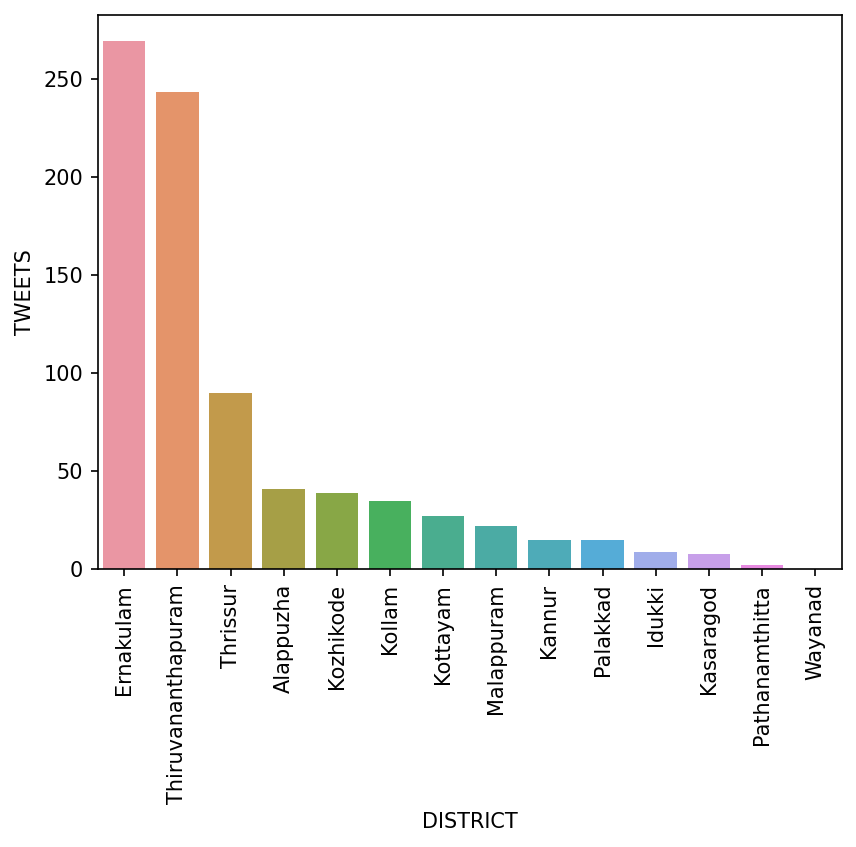

In [44]:
sns.barplot(dist_df,x=dist_df['DISTRICT'],y=dist_df['TWEETS'],order = dist_df.sort_values('TWEETS', ascending=False).DISTRICT)
plt.xticks(rotation=90)
plt.show()

In [45]:
kerala_map = gpd.read_file('district.shp')
kerala_map = pd.merge(kerala_map, dist_df, on = 'DISTRICT', how = "left")

In [46]:
kerala_map

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,orig_ogc_f,geometry,TWEETS
0,Alappuzha,Kerala,32,11,598,7,"POLYGON ((76.37334 9.83565, 76.37955 9.82888, ...",41
1,Ernakulam,Kerala,32,8,595,173,"POLYGON ((76.68924 10.26721, 76.68724 10.26170...",269
2,Idukki,Kerala,32,9,596,232,"POLYGON ((77.28895 10.22973, 77.29462 10.21643...",9
3,Kannur,Kerala,32,2,589,277,"POLYGON ((75.46997 12.30049, 75.48558 12.29131...",15
4,Kasaragod,Kerala,32,1,588,288,"POLYGON ((75.41667 12.50166, 75.42240 12.48463...",8
5,Kollam,Kerala,32,13,600,314,"POLYGON ((77.20860 9.07053, 77.20579 9.06505, ...",35
6,Kottayam,Kerala,32,10,597,320,"POLYGON ((76.63309 9.85565, 76.63167 9.85296, ...",27
7,Kozhikode,Kerala,32,4,591,321,"POLYGON ((75.53697 11.69275, 75.54093 11.69615...",39
8,Malappuram,Kerala,32,5,592,358,"POLYGON ((76.44699 11.20171, 76.44112 11.20301...",22
9,Palakkad,Kerala,32,6,593,422,"POLYGON ((76.83918 10.33834, 76.83516 10.33669...",15


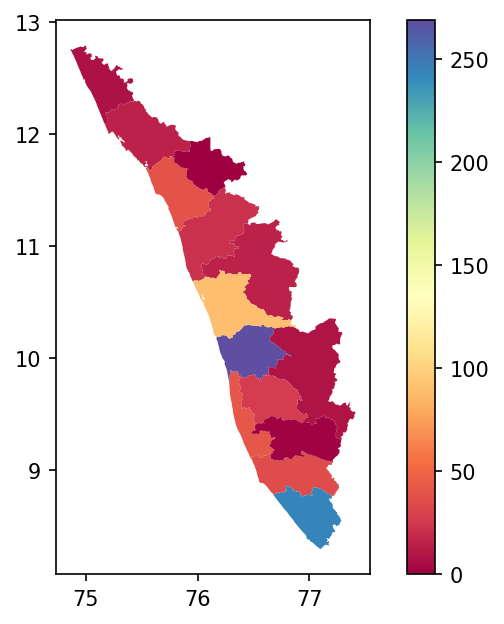

<Figure size 4000x2400 with 0 Axes>

In [47]:
kerala_map.plot(column= kerala_map['TWEETS'], cmap = 'Spectral',legend = True)
plt.figure(figsize = (10,6), dpi = 400)
plt.show()


In [48]:
# df_old = pd.read_excel('data_excel.xlsx')
# df_old = df_old[['date','rawContent','place','hashtags']]
# df_old = df_old[df_old['place'].notna()]
# df_old['rawContent']=df_old['rawContent'].apply(str.lower)
# counter= 0 
# wordfilter = ['damage', 'building','flooded','destroy','devastate','wreck','ruin','collapse','wash','inundate','submerge','demolish','impact','affect','lost','help']
# for sentence in df_old['rawContent']:
#     if any(word in sentence for word in wordfilter):
#         print(sentence)
#         counter = counter+1
# print(counter)

In [49]:
# df['rawContent'] = df['rawContent'].apply(str.lower)
# wordfilter = ['damage', 'building','flooded','destroy','devastate','wreck','ruin','collapse','wash','inundate','submerge','demolish','impact','affect','lost','help']
# counter = 0
# for i in range(2530):
#     if any(word in df['rawContent'][i] for word in wordfilter):
#         # df_dam = df_dam.append()
#         print(df['place'][i])
#         counter = counter + 1
# print(counter)
